## Background

- Dataset Information

The NHANES dataset was created to assess the health and nutritional status of adults and children in the United States. This dataset is funded by the Centers for Disease Control and Prevention (CDC), specifically through its National Center for Health Statistics (NCHS). The data is based on the survey respondents throughout the United States. Data was gathered through interviews, physical examinations, and laboratory tests. For this subset respondents 65 years old and older were labeled as “senior” and all individuals under 65 years old as “non-senior.”

### Task

As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and apply the machine learning models for the specified tasks. Your analysis should aim to identify any relationships or trends in the data. Recognise suitable independent variables and target variable from the dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on your analysis if applicable. You can generate synthetic data or use any additional data to support your machine learning models if required.

### Approach

For this analysis, we will approach the case aiming to fit a Machine Learning model that would be able to predict if a individual has diabetes or not and if the individual is in danger of having diabites, we will address the case with a Random Forest Classifier model, due to its multiple benefits like low risk of overfitting, easy to determine feature importance and not needing considerable pre-processing work.

### Importing libraries
These libraries will help us perform a proper analysis for our case.

In [133]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
pca = PCA()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
import sklearn.preprocessing as preproc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

### Load NHANES dataset and explore it by performing an Early data analysis (EDA)
After conducting an EDA, we will have a better understanding of our dataset, from its shape to its data.

#### Dataset dictionary

- SEQN: ID, Respondent Sequence Number.
- age_group: Respondent's Age Group (senior (65 or older)/non-senior).
- RIDAGEYR: Respondent's Age.
- RIAGENDR: Respondent's Gender, a 1 represents Male and 2 represents Female.
- PAQ605: A 1 represents that the respondent takes part in weekly moderate or vigorous-intensity physical activity and a 2 represents that they do not.
- BMXBMI: Respondent's Body Mass Index.
- LBXGLU: Respondent's Blood Glucose after fasting.
- DIQ010: If the Respondent is diabetic, 1:yes, 2:no, 3:borderline.
- LBXGLT: Respondent's Glucose value.
- LBXIN: Respondent's Blood Insulin Levels.

In [2]:
df = pd.read_csv('NHANES_age_prediction.csv')
df.head(-5)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2268,83692.0,Senior,68.0,1.0,2.0,19.1,89.0,2.0,136.0,1.56
2269,83694.0,Adult,36.0,2.0,2.0,25.3,99.0,2.0,128.0,20.72
2270,83699.0,Adult,37.0,2.0,2.0,20.8,83.0,2.0,113.0,1.93
2271,83702.0,Senior,80.0,2.0,2.0,27.9,111.0,2.0,72.0,13.91


In [3]:
df.shape

(2278, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [5]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [6]:
df.isnull().mean()*100 # Percentage of missing data on each column.

SEQN         0.0
age_group    0.0
RIDAGEYR     0.0
RIAGENDR     0.0
PAQ605       0.0
BMXBMI       0.0
LBXGLU       0.0
DIQ010       0.0
LBXGLT       0.0
LBXIN        0.0
dtype: float64

#### Null values
From the above 'isnull()' method we can observe that the dataset does not has null values.

#### Feature engineering

To further understand our dataset, we need to manipulate it in a way that will enable us to compare values.

In [7]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

To help us visualize our data, we will create new columns with the data of previous ones, these new columns will hold the following data:

- 'gender' holds 'RIAGENDR'
- 'exercise' holds 'PAQ605'
- 'senior' holds 'age_group'
- 'diabetic' holds 'DIQ010' - our target

In [8]:
df['gender'] = df['RIAGENDR'].replace([1, 2], [0, 1]) # 0:Male , 1:Female
df['exercise'] = df['PAQ605'].replace([2, 1], [0, 1]) # 0:No exercise, 1:Exercise
df['senior'] = df['age_group'].replace(['Adult', 'Senior'], [0, 1]) # 0:Adult, 1:Senior
df['diabetic'] = df['DIQ010'].replace([1, 2, 3], [1, 0, 2]) # 1:diabetic, 0:no diabetic, 2:boderline diabetic

df.head(-5)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,gender,exercise,senior,diabetic
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,1.0,0.0,0,0.0
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,1.0,0.0,0,0.0
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0,0.0,0,0.0
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0.0,0.0,0,0.0
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,1.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,83692.0,Senior,68.0,1.0,2.0,19.1,89.0,2.0,136.0,1.56,0.0,0.0,1,0.0
2269,83694.0,Adult,36.0,2.0,2.0,25.3,99.0,2.0,128.0,20.72,1.0,0.0,0,0.0
2270,83699.0,Adult,37.0,2.0,2.0,20.8,83.0,2.0,113.0,1.93,1.0,0.0,0,0.0
2271,83702.0,Senior,80.0,2.0,2.0,27.9,111.0,2.0,72.0,13.91,1.0,0.0,1,0.0


In [9]:
df.drop(columns='DIQ010', inplace=True) # We now have this data in our 'diabetic' column, we can drop this column.
df.drop(columns='SEQN', inplace=True) # We do not need this feature since is an ID, has no value for the analysis.
df.drop(columns='age_group', inplace=True) # Since we have this data in our 'senior' column, we can drop this column.
df.drop(columns='RIDAGEYR', inplace=True) # We need to drop this columns due to it holds 'age_group' data in a numeric form.
df.drop(columns='RIAGENDR', inplace=True) #Since we now have an encoded gender feature with 0 and 1, we can drop this column.
df.drop(columns='PAQ605', inplace=True) # We have a new column with this data represented with 0 and 1, we can drop this column.
df.head(-5)

,BMXBMI,LBXGLU,LBXGLT,LBXIN,gender,exercise,senior,diabetic
0,35.7,110.0,150.0,14.91,1.0,0.0,0,0.0
1,20.3,89.0,80.0,3.85,1.0,0.0,0,0.0
2,23.2,89.0,68.0,6.14,0.0,0.0,0,0.0
3,28.9,104.0,84.0,16.15,0.0,0.0,0,0.0
4,35.9,103.0,81.0,10.92,1.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...
2268,19.1,89.0,136.0,1.56,0.0,0.0,1,0.0
2269,25.3,99.0,128.0,20.72,1.0,0.0,0,0.0
2270,20.8,83.0,113.0,1.93,1.0,0.0,0,0.0
2271,27.9,111.0,72.0,13.91,1.0,0.0,1,0.0


In [10]:
df.rename(columns={'BMXBMI':'body_mass_index', 'LBXGLU':'glucose_after_fasting', 'LBXGLT':'glucose_value','LBXIN':'insulin_level'}, inplace=True)
df.head()

,body_mass_index,glucose_after_fasting,glucose_value,insulin_level,gender,exercise,senior,diabetic
0,35.7,110.0,150.0,14.91,1.0,0.0,0,0.0
1,20.3,89.0,80.0,3.85,1.0,0.0,0,0.0
2,23.2,89.0,68.0,6.14,0.0,0.0,0,0.0
3,28.9,104.0,84.0,16.15,0.0,0.0,0,0.0
4,35.9,103.0,81.0,10.92,1.0,1.0,0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   body_mass_index        2278 non-null   float64
 1   glucose_after_fasting  2278 non-null   float64
 2   glucose_value          2278 non-null   float64
 3   insulin_level          2278 non-null   float64
 4   gender                 2278 non-null   float64
 5   exercise               2278 non-null   float64
 6   senior                 2278 non-null   int64  
 7   diabetic               2278 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 142.5 KB


In [12]:
df.shape

(2278, 8)

In [13]:
df['diabetic'] = df['diabetic'].astype(int)
df['gender'] = df['gender'].astype(int)
df['exercise'] = df['exercise'].astype(int)
df.dtypes

body_mass_index          float64
glucose_after_fasting    float64
glucose_value            float64
insulin_level            float64
gender                     int32
exercise                   int32
senior                     int64
diabetic                   int32
dtype: object

#### Visualization

After performing our feature engineering, we require to visualize our dataset to get more information about it.

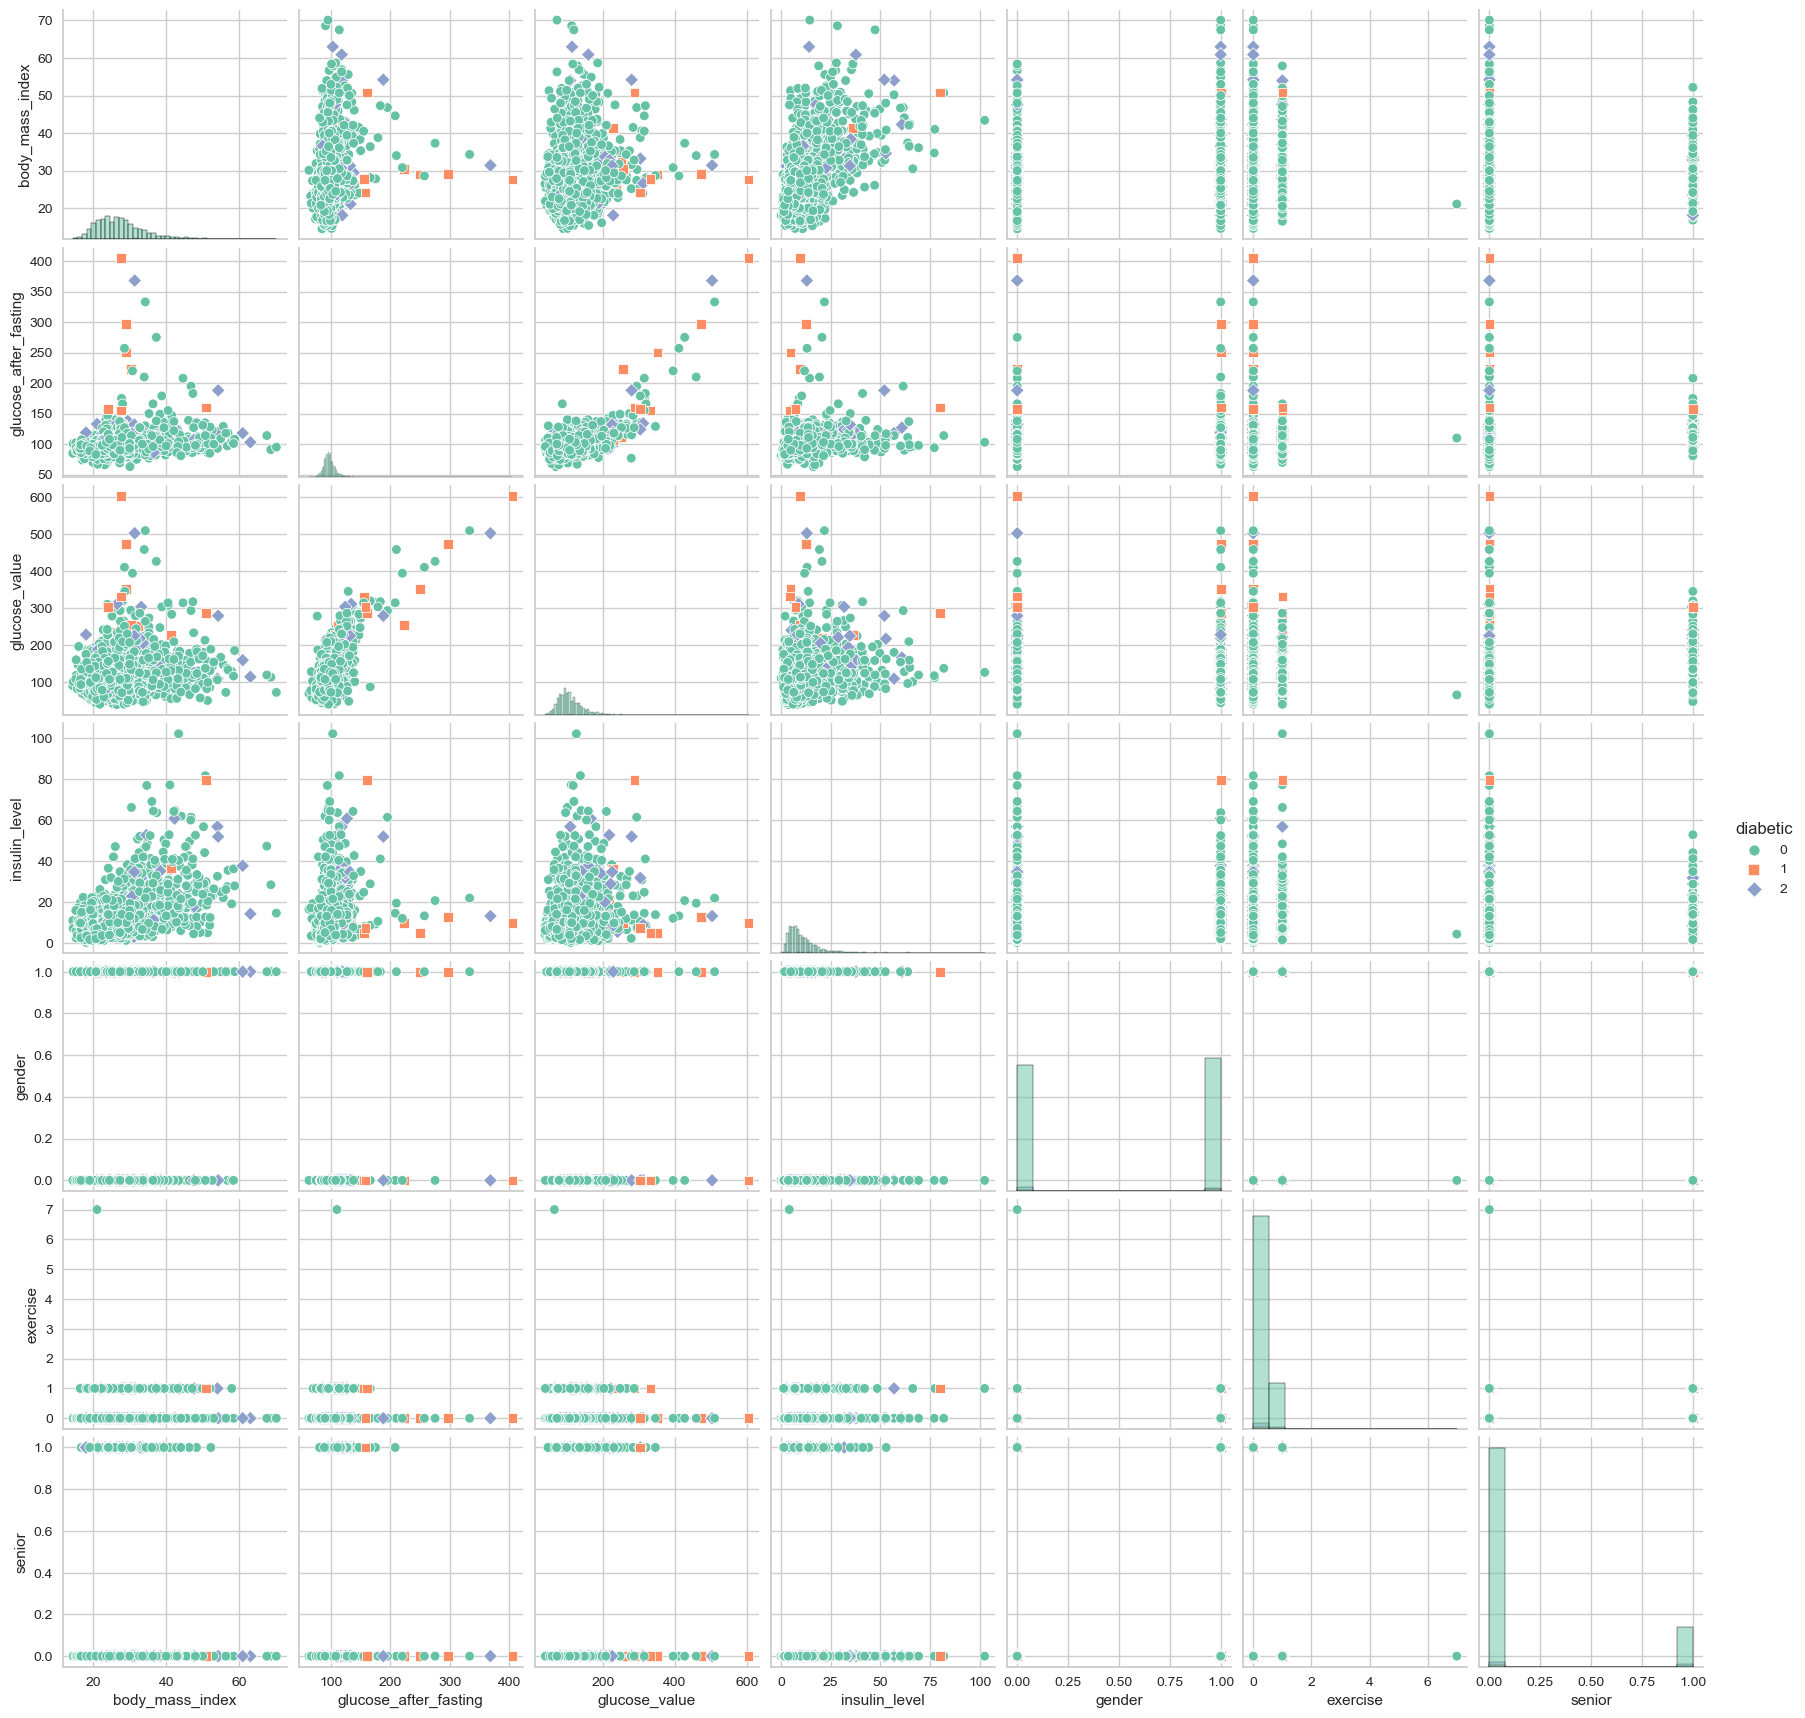

In [14]:
sns.pairplot(data=df, hue='diabetic', diag_kind='hist', markers=['o', 's', 'D'], palette='Set2')

From the above pairplot, we can notice:
- We do not have a clear pattern
- Imbalanced data (looking at at the last plot in the bottom right)
- Skewed data

#### Visualization to confirm if we have a balanced data or not

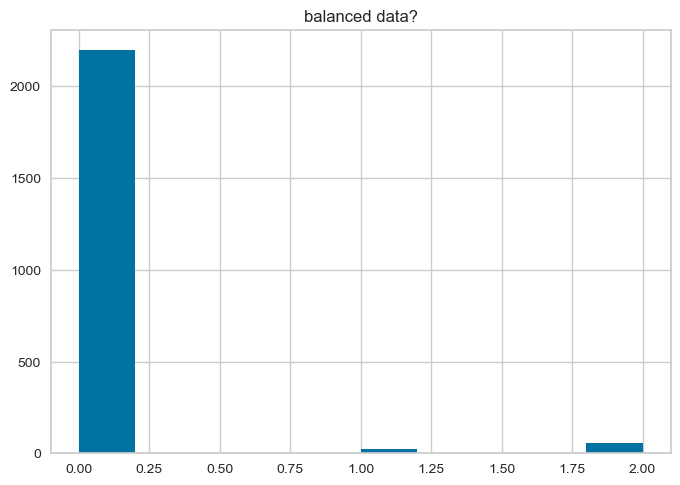

In [15]:
plt.hist(df['diabetic']);
plt.title('balanced data?')
plt.show()

In [16]:
df.groupby('diabetic').size()

diabetic
0    2199
1      21
2      58
dtype: int64

In [17]:
proportions = ((df.groupby('diabetic').size())/df['diabetic'].count()*100) # Percentage of each group, if senior or not.
proportions

diabetic
0    96.532046
1     0.921861
2     2.546093
dtype: float64

As we can observe, we have an imbalanced data, being 96.5% of the data from non diabetic individuals, consequently, for our Machine Learning model we will need to use the balanced random forest classifier that works better than a normal random forest classifier for imbalanced data.

#### Visualizations to confirm if we have a skewed data or not

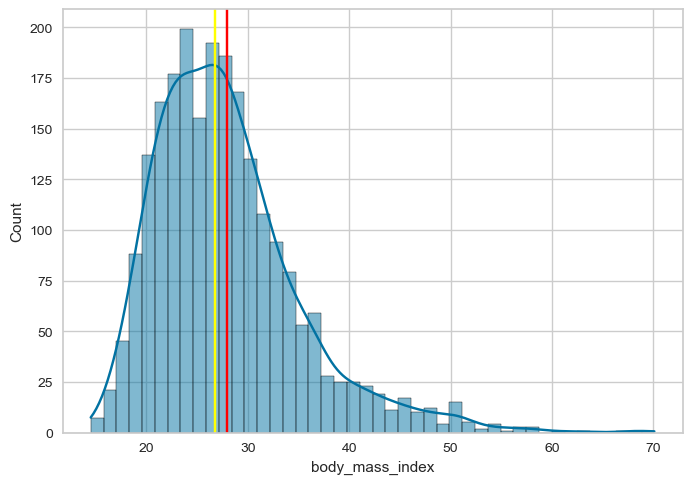

In [18]:
# Distribution of our numeric features

sns.histplot(data=df, x='body_mass_index', kde=True)
plt.axvline(x=df.body_mass_index.mean(), color='red') # Mean value of the body_mass_index feature
plt.axvline(x=df.body_mass_index.median(), color='yellow') # Median value of the body_mass_index feature

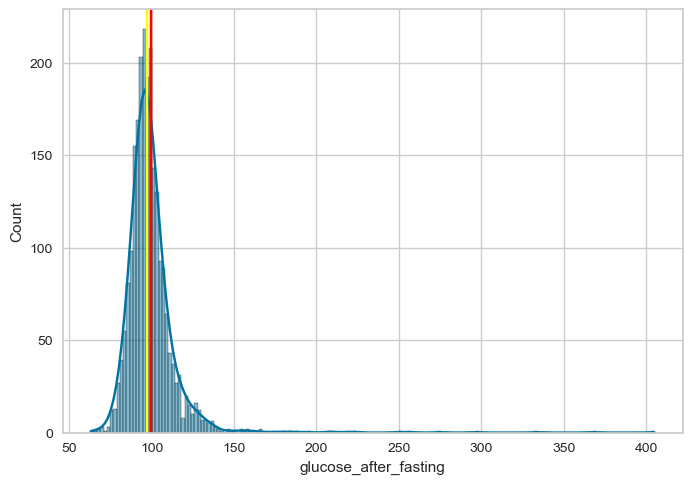

In [19]:
sns.histplot(data=df, x='glucose_after_fasting', kde=True)
plt.axvline(x=df.glucose_after_fasting.mean(), color='red') # Mean value of the glucose_after_fasting feature
plt.axvline(x=df.glucose_after_fasting.median(), color='yellow') # Median value of the glucose_after_fasting feature

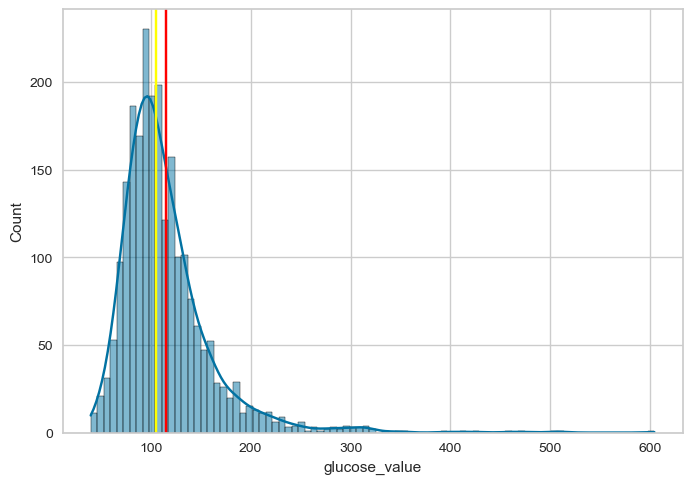

In [20]:
sns.histplot(data=df, x='glucose_value', kde=True)
plt.axvline(x=df.glucose_value.mean(), color='red') # Mean value of the glucose_value feature
plt.axvline(x=df.glucose_value.median(), color='yellow') # Median value of the glucose_value feature

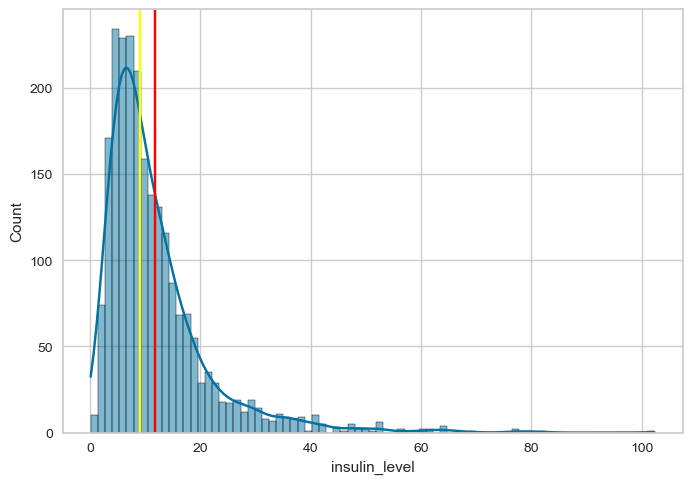

In [21]:
sns.histplot(data=df, x='insulin_level', kde=True)
plt.axvline(x=df.insulin_level.mean(), color='red') # Mean value of the insulin_level feature
plt.axvline(x=df.insulin_level.median(), color='yellow') # Median value of the insulin_level feature

As shown, we can say that we have right-skewed (positive skewed) data since our median value is on the left side of our mean value, therefore, we will scale our data using min-max scaler to bring all of our values into a 0 to 1 range.

In [22]:
df_scaled = preproc.minmax_scale(df.iloc[:,0:7])
df_scaled = pd.DataFrame(data=df_scaled, columns=df.iloc[:,0:7].columns)
df_scaled.head()

,body_mass_index,glucose_after_fasting,glucose_value,insulin_level,gender,exercise,senior
0,0.381295,0.137427,0.195035,0.144591,1.0,0.000000,0.0
1,0.104317,0.076023,0.070922,0.036319,1.0,0.000000,0.0
2,0.156475,0.076023,0.049645,0.058737,0.0,0.000000,0.0
3,0.258993,0.119883,0.078014,0.156730,0.0,0.000000,0.0
4,0.384892,0.116959,0.072695,0.105531,1.0,0.142857,0.0


In [23]:
X = df_scaled
y = df.iloc[:,7]

In [24]:
X.shape, y.shape

((2278, 7), (2278,))

#### Exploring the possibility of dimensional reduction

Knowing that we only have 7 independent features and 2278 observations we might not need to perform dimensional reduction, let's explore the possibility of using Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA). 

#### PCA

Text(0, 0.5, 'cumulative explained variance')

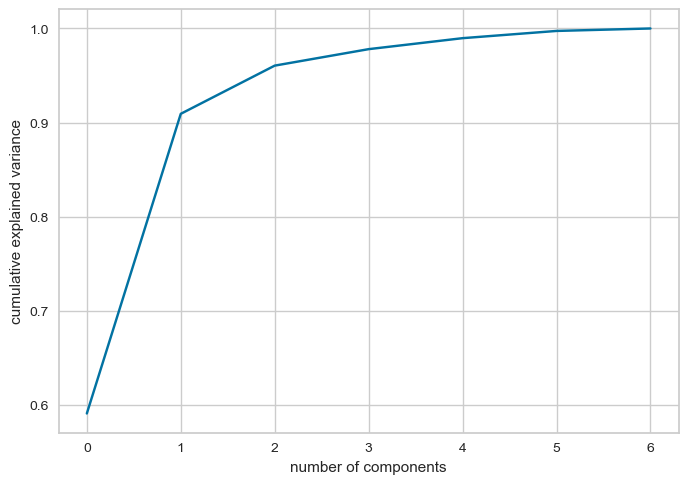

In [25]:
pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

As we can see, we would need our 7 features to preserve 100% of our pattern in our data and only 2 features to preserve above 90% of our pattern in our data.

In [26]:
pca = PCA(2)
x_pca = pca.fit_transform(X,y)

<Axes: >

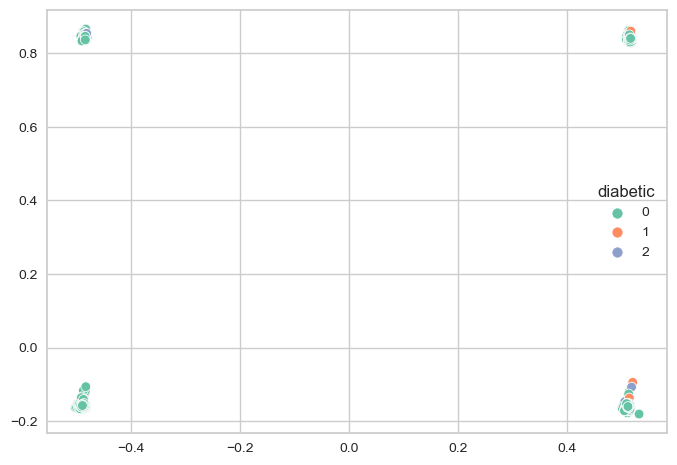

In [27]:
sns.scatterplot(data=x_pca,
x=x_pca[:,0],
y=x_pca[:,1],
hue=y,
palette='Set2')

#### LDA

In [28]:
lda = lda.fit_transform(X,y)

<Axes: >

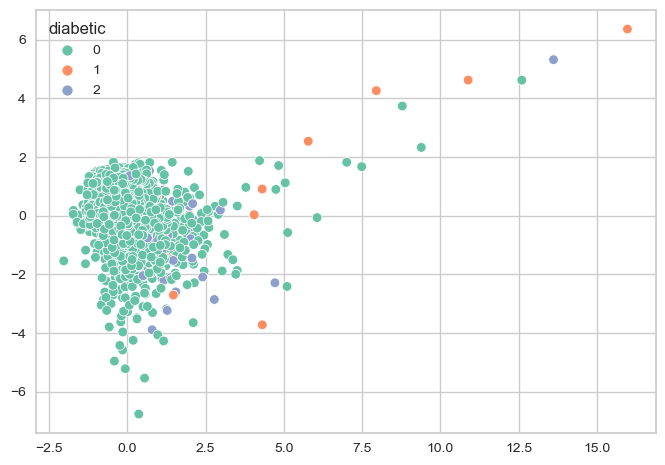

In [29]:
sns.scatterplot(data=lda,
x=lda[:,0],
y=lda[:,1],
hue=y,
palette='Set2')

As we can notice, LDA works better than PCA to solve multi class classification problems, but it is not working effectively, this could be due to our imbalanced data.

### Balanced Random Forest Classifier

To perform a Hyperparameter tuning, we can use the Grid Search library to help us iterate multiple values of parameters through the Machine Learning model.

For choosing the best parameters for our model, we will be measuring them using Precision and Accuracy scores, when both values are at their highest score, those values will become the best parameters.

In addition, our scores will be gotten with Stratified K fold, that is a cross-validation technique to ensure the authenticity of those scores.

In [30]:
tuning_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes': [3, 4, 5, 6, 7],
    'sampling_strategy': ['auto', 'all'],
    'replacement': [False],
    'random_state': [4]
}

scoring = {'Precision': make_scorer(precision_score), 'Accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.10, random_state=4)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((2050, 7), (228, 7), (2050,), (228,))

In [32]:
grid_search1 = GridSearchCV(BalancedRandomForestClassifier(), 
                           param_grid=tuning_grid, scoring=scoring, refit='Accuracy', cv=kfold) 
grid_search1.fit(X1_train, y1_train)
print(grid_search1.best_estimator_)

BalancedRandomForestClassifier(max_depth=3, max_leaf_nodes=6,
                               min_samples_leaf=3, n_estimators=20,
                               random_state=4, replacement=False,
                               sampling_strategy='auto')


In [33]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.20, random_state=4)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((1822, 7), (456, 7), (1822,), (456,))

In [34]:
grid_search2 = GridSearchCV(BalancedRandomForestClassifier(), 
                           param_grid=tuning_grid, scoring=scoring, refit='Accuracy', cv=kfold) 
grid_search2.fit(X2_train, y2_train) 
print(grid_search2.best_estimator_) 

BalancedRandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=3,
                               min_samples_leaf=3, n_estimators=30,
                               random_state=4, replacement=False,
                               sampling_strategy='all')


In [35]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.30, random_state=4)
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((1594, 7), (684, 7), (1594,), (684,))

In [36]:
grid_search3 = GridSearchCV(BalancedRandomForestClassifier(), 
                           param_grid=tuning_grid, scoring=scoring, refit='Accuracy', cv=kfold) 
grid_search3.fit(X3_train, y3_train) 
print(grid_search3.best_estimator_) 

BalancedRandomForestClassifier(max_depth=3, max_leaf_nodes=3,
                               min_samples_leaf=4, n_estimators=20,
                               random_state=4, replacement=False,
                               sampling_strategy='all')


In [37]:
print('Best Hyperparameters (90% training):',grid_search1.best_params_)
print('Best Score (90% training):',grid_search1.best_score_)
print('Best Hyperparameters (80% training):',grid_search2.best_params_)
print('Best Score (80% training):',grid_search2.best_score_)
print('Best Hyperparameters (70% training):',grid_search3.best_params_)
print('Best Score (70% training):',grid_search3.best_score_)

Best Hyperparameters (90% training): {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'n_estimators': 20, 'random_state': 4, 'replacement': False, 'sampling_strategy': 'auto'}
Best Score (90% training): 0.741951219512195
Best Hyperparameters (80% training): {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'n_estimators': 30, 'random_state': 4, 'replacement': False, 'sampling_strategy': 'all'}
Best Score (80% training): 0.6992533493903357
Best Hyperparameters (70% training): {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'min_samples_leaf': 4, 'n_estimators': 20, 'random_state': 4, 'replacement': False, 'sampling_strategy': 'all'}
Best Score (70% training): 0.7603359555213817


In [105]:
results_grid = [grid_search1.best_score_, grid_search2.best_score_, grid_search3.best_score_]

# 90% training - 10% testing, 80% training - 20% testing and 70% training - 30% testing
label_results = [90, 80, 70]

results_grid = pd.DataFrame(results_grid)
label_results = pd.DataFrame(label_results)

results_grid['split'] = label_results
results_grid['acc_score'] = results_grid[0]
results_grid.drop(columns=0, inplace=True)
results_grid

,split,acc_score
0,90,0.741951
1,80,0.699253
2,70,0.760336


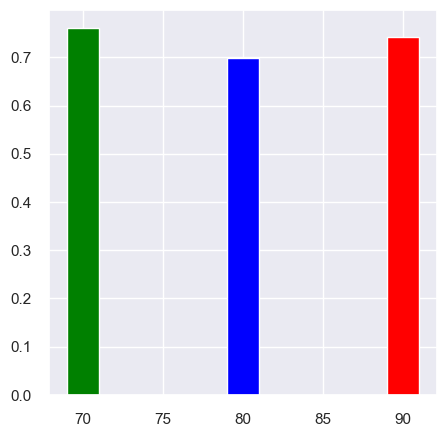

In [107]:
sns.set(rc={"figure.figsize":(5,5)})

plt.bar( results_grid['split'], results_grid['acc_score'], width=2, color=['red', 'blue', 'green'])
plt.show()

#### Scores comparison (Training v Testing)

We will now search for our best model, using Balanced Random Forest Classifier with our best hyperparameters for each train - test split gotten with Grid Search.

#### 90% training

In [131]:
RF1 = BalancedRandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=6, min_samples_leaf=3,
                                     n_estimators=20, random_state=4, replacement= False, sampling_strategy='auto')
RF1.fit(X1_train, y1_train)
train1_pred = RF1.predict(X1_train)
y1_pred = RF1.predict(X1_test)


print('Accuracy (training): {:.2f}'.format(metrics.accuracy_score(y1_train, train1_pred)))
print('Precision (training): {:.2f}'.format(metrics.precision_score(y1_train, train1_pred, average='micro')))
print('Accuracy (test): {:.2f}'.format(metrics.accuracy_score(y1_test, y1_pred)))
print('Precision (test): {:.2f}'.format(metrics.precision_score(y1_test, y1_pred, average='micro')))
print('Cross validation score: {:.2f}'.format(cross_val_score(RF1, X, y, scoring='accuracy', cv=10).mean()))

Accuracy (training): 0.71
Precision (training): 0.71
Accuracy (test): 0.75
Precision (test): 0.75
Cross validation score: 0.70


#### 80% training

In [126]:
RF2 = BalancedRandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=3, min_samples_leaf=3,
                                     n_estimators=30, random_state=4, replacement= False, sampling_strategy='all')
RF2.fit(X2_train, y2_train)
train2_pred = RF2.predict(X2_train)
y2_pred = RF2.predict(X2_test)


print('Accuracy (training): {:.2f}'.format(metrics.accuracy_score(y2_train, train2_pred)))
print('Precision (training): {:.2f}'.format(metrics.precision_score(y2_train, train2_pred, average='micro')))
print('Accuracy (test): {:.2f}'.format(metrics.accuracy_score(y2_test, y2_pred)))
print('Precision (test): {:.2f}'.format(metrics.precision_score(y2_test, y2_pred, average='micro')))
print('Cross validation score: {:.2f}'.format(cross_val_score(RF2, X, y, scoring='accuracy', cv=10).mean()))

Accuracy (training): 0.78
Precision (training): 0.78
Accuracy (test): 0.82
Precision (test): 0.82
Cross validation score: 0.78


#### 70% training

In [127]:
RF3 = BalancedRandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3, min_samples_leaf=4,
                                     n_estimators=20, random_state=4, replacement= False, sampling_strategy='all')
RF3.fit(X3_train, y3_train)
train3_pred = RF3.predict(X3_train)
y3_pred = RF3.predict(X3_test)


print('Accuracy (training): {:.2f}'.format(metrics.accuracy_score(y3_train, train3_pred)))
print('Precision (training): {:.2f}'.format(metrics.precision_score(y3_train, train3_pred, average='micro')))
print('Accuracy (test): {:.2f}'.format(metrics.accuracy_score(y3_test, y3_pred)))
print('Precision (test): {:.2f}'.format(metrics.precision_score(y3_test, y3_pred, average='micro')))
print('Cross validation score: {:.2f}'.format(cross_val_score(RF3, X, y, scoring='accuracy', cv=10).mean()))

Accuracy (training): 0.62
Precision (training): 0.62
Accuracy (test): 0.67
Precision (test): 0.67
Cross validation score: 0.73


As we can observe, our 80% training - 20% testing machine learning model is the one that is more consistent throughout every score, thus, we will take a closer look to it, observing its predictions and what features are more relevant for the model.

### Further analysis on our best model (80% training)

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       441
           1       0.09      0.50      0.16         6
           2       0.08      0.44      0.13         9

    accuracy                           0.82       456
   macro avg       0.39      0.59      0.40       456
weighted avg       0.96      0.82      0.88       456



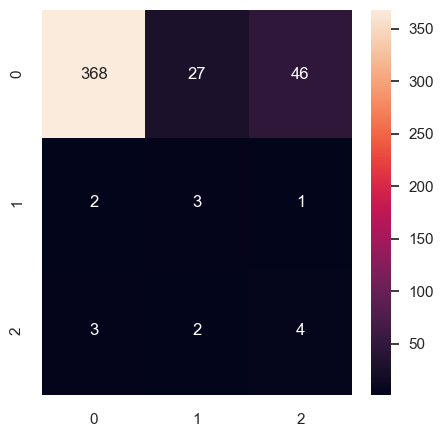

In [140]:
cm2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm2, annot=True, fmt='g')
print(classification_report(y2_test, y2_pred))

#### Feature importances

In [142]:
features2 = pd.DataFrame(RF2.feature_importances_).T
features2.columns = X.columns
features2

,body_mass_index,glucose_after_fasting,glucose_value,insulin_level,gender,exercise,senior
0,0.093101,0.233632,0.466169,0.115052,0.0,0.0,0.092045


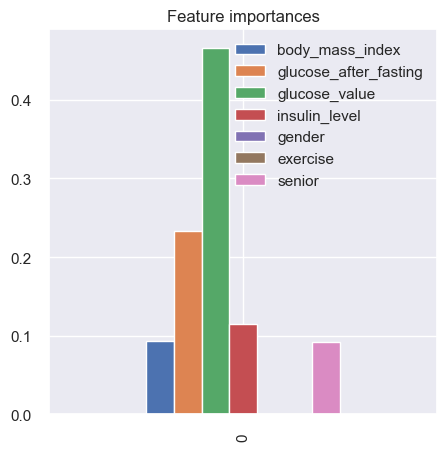

In [144]:
features2.plot(kind='bar', title='Feature importances');

### Conclusions

For this analysis, we can say that we would need more data from diabetic individuals to be able to train our model with enough data to effectively predict individuals with diabetes from indepentent features.

As shown in our last plot, glucose and insulin are the more important features when predicting if an individual has diabetes or not, whilst gender and exercise are irrelevant in this case scenario, this result is quite interesting, knowing that one of the key facts of treating or avoiding diabetes is physical activity, however, this could be happening due to our imbalanced data and it might gain more relevance as we get more data of diabetic individuals.

According to the Centers for Disease Control and Prevention (CDC), there are more features that we could analyse to be able to improve our machine learning model (assuming that we got enough data):

- Urinate a lot, often at night
- Are very thirsty
- Lose weight without trying
- Are very hungry
- Have blurry vision
- Have numb or tingling hands or feet
- Feel very tired
- Have very dry skin
- Have sores that heal slowly
- Have more infections than usual
